In [1]:
%run "subhead.ipynb"

In [2]:
import cooler
from hic_basic.coolstuff import cool2mat
from hic_basic.plot.hic import _plot_mat
from hic_basic.plot.utils import tiling_mat

In [3]:
coolps = {
    #"Sperm_hg_gam" : str(h.ddir / "Sperm_hg.MR15.orphan__0_98.1m.cool"),
    "Sperm_hg_gam" : str(h.ddir / "Sperm_hg.MR15.fthres__4.1m.cool"),
    "Sperm_hg_gam_50k" : str(h.ddir / "Sperm_hg.MR15.fthres__4.50k.cool"),
    "Sperm_hg" : str(h.ddir / "Sperm_hg.pileup.1k.mcool::resolutions/1000000"),
    "Sperm_hg_50k" : str(h.ddir / "Sperm_hg.pileup.1k.mcool::resolutions/50000"),
    "Rao2014_50k" : "/share/Data/ychi/raw/Rao2014/4DN_cooler/GM12878.n.mcool::resolutions/50000",
}

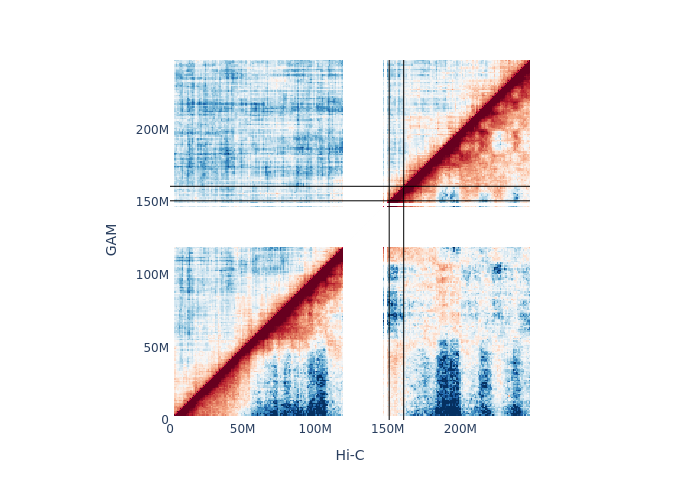

In [15]:
region = "chr1"
hic_file = coolps["Sperm_hg"]
gam_file = coolps["Sperm_hg_gam"]
fig = plot_tilling_gam_hic(hic_file, gam_file, region, add_xy=True,
    gam_kwargs={"zmax":1,"cmap":"rdbu_r"}, hic_kwargs={"cmap":"rdbu_r"})
fig.add_shape(
    type="rect", x0=151_000_000, x1=151_000_000, y0=161_000_000, y1=161_000_000, line=dict(color="black", width=1_000_000)
)
fig.add_vline(x=151_000_000, line=dict(color="black", width=1))
fig.add_vline(x=161_000_000, line=dict(color="black", width=1))
fig.add_hline(y=151_000_000, line=dict(color="black", width=1))
fig.add_hline(y=161_000_000, line=dict(color="black", width=1))

fig.show(renderer="png")

/share/home/ychi/dev/hic_basic/hic_basic/compartment.py:34: RuntimeWarning:

Mean of empty slice

/share/home/ychi/dev/hic_basic/hic_basic/compartment.py:34: RuntimeWarning:

Mean of empty slice

/share/home/ychi/dev/hic_basic/hic_basic/compartment.py:34: RuntimeWarning:

Mean of empty slice

/share/home/ychi/dev/hic_basic/hic_basic/compartment.py:34: RuntimeWarning:

Mean of empty slice

/share/home/ychi/dev/hic_basic/hic_basic/compartment.py:34: RuntimeWarning:

Mean of empty slice

/share/home/ychi/dev/hic_basic/hic_basic/compartment.py:34: RuntimeWarning:

Mean of empty slice

/share/home/ychi/dev/hic_basic/hic_basic/compartment.py:34: RuntimeWarning:

Mean of empty slice

/share/home/ychi/dev/hic_basic/hic_basic/compartment.py:34: RuntimeWarning:

Mean of empty slice

/share/home/ychi/dev/hic_basic/hic_basic/compartment.py:34: RuntimeWarning:

Mean of empty slice

/share/home/ychi/dev/hic_basic/hic_basic/compartment.py:34: RuntimeWarning:

Mean of empty slice

/share/home/ychi/dev

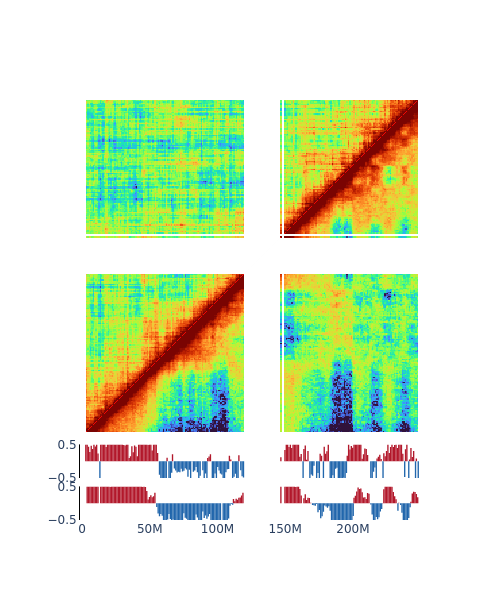

In [5]:
from hic_basic.genome import Region
from hic_basic.plot.hic import add_eig_track
def plot_tilling_gam_hic_eigens(hic_file, gam_file, hic_eigen, ref_track, region, genome,
    gam_file_for_compartment=None, hic_file_for_compartment=None, y_kwargs={}, hic_balance=True, title="", **kwargs):
    fig = make_subplots(
        rows=3,
        cols=1,
        shared_xaxes=True,
        row_heights=[10, 1, 1],
        vertical_spacing=0.02
    )
    # --- add tiling compartment --- #
    img_mat = plot_tilling_gam_hic(hic_file, gam_file, region, hic_balance=hic_balance, **kwargs)
    fig.add_trace(
        img_mat.data[0]
    )
    fig.update_xaxes(
        title = "",
        row=1,
        col=1
    )
    fig.update_yaxes(
        title = "",
        autorange = True, # vital! Otherwise, the heatmap willbe upside down
        visible = False,
        row=1,
        col=1
    )
    # --- add eigen tracks --- #
    # calculate gam eigen
    clr = cooler.Cooler(
        hic_file if hic_file_for_compartment is None else hic_file_for_compartment
    )
    bins = clr.bins()[:]
    bad_bins = bins.loc[bins["weight"].isna()]
    gam_eigen = GAM_compartments(
        gam_file if gam_file_for_compartment is None else gam_file_for_compartment,
        ref_track,
        #min_nz=10,
        bad_bins=bad_bins
        )
    # tidy eigen df
    hic_eigen["AB"] = "A"
    hic_eigen.loc[hic_eigen["E1"] < 0, "AB"] = "B"
    #gam_subset = gam_eigen.query("chrom == @chrom")
    #gam_subset = gam_subset.sort_values("start")
    region_r = Region(region, genome=genome).r
    gam_subset = gam_eigen.set_index(["chrom","start"]).sort_index()
    #print(gam_subset, region_r[0])
    gam_subset = gam_subset.loc[region_r[0]:region_r[1],:].reset_index()
    #hic_subset = hic_eigen.query("chrom == @chrom")
    #hic_subset = hic_subset.sort_values("start")
    hic_subset = hic_eigen.set_index(["chrom","start"]).sort_index()
    hic_subset = hic_subset.loc[region_r[0]:region_r[1],:].reset_index()
    data = {
        "GAM" : gam_subset,
        "HiC" : hic_subset
    }
    for row, col, i, feature in filling_l2r_plotly(2, 1, features=[["GAM","eigen"],["HiC","E1"]]):
        data_type, eig_col = feature
        fig = add_eig_track(
            fig, data[data_type],eig_col=eig_col,
            y_kwargs = y_kwargs,
            row=row+1, # under the heatmap
            col=col
            )
    fig.update_layout(
        height = 600,
        width = 500,
        title = title,
        plot_bgcolor = "rgba(0,0,0,0)",
    )
    #fig.update_yaxes(visible=False)
    return fig
chrom = "chr1"
genome = "GRCh38"
hic_file = coolps["Sperm_hg"]
gam_file = coolps["Sperm_hg_gam"]
hic_eigen = pd.read_table(
    h.ddir / "Sperm_hg.cis.vecs.tsv"
)
ref_track = pd.read_table(
    h.ddir / "GRCh38.gc.1m.tsv",
    index_col=["chrom","start"]
)["GC"]
fig = plot_tilling_gam_hic_eigens(hic_file, gam_file, hic_eigen, ref_track, chrom, genome)
fig.show(renderer="png")

In [7]:
import warnings
Fin = True
if not Fin:
    regions = [
        # "chr1:10,000,000-20,000,000",
        # "chr1:20,000,000-30,000,000",
        # "chr1:30,000,000-40,000,000",
        # "chr1:40,000,000-50,000,000",
        # "chr1:50,000,000-60,000,000",
        # "chr1:60,000,000-70,000,000",
        # "chr1:70,000,000-80,000,000",
        "chr1:80,000,000-90,000,000",
        "chr1:90,000,000-100,000,000",
        "chr1:100,000,000-110,000,000",
        "chr1:110,000,000-120,000,000",
        "chr1:120,000,000-130,000,000",
        #"chr1:130,000,000-140,000,000",
        #"chr1:140,000,000-150,000,000",
        "chr1:150,000,000-160,000,000",
        "chr1:160,000,000-170,000,000",
        "chr1:170,000,000-180,000,000",
        "chr1:180,000,000-190,000,000",
        "chr1:190,000,000-200,000,000",
        "chr1:200,000,000-210,000,000",
        "chr1:210,000,000-220,000,000",
        "chr1:220,000,000-230,000,000",
        "chr1:230,000,000-240,000,000",
    ]
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        for region in regions:
            region = region
            genome = "GRCh38"
            hic_file = coolps["Sperm_hg_50k"]
            gam_file = coolps["Sperm_hg_gam_50k"]
            hic_eigen = pd.read_table(
                h.ddir / "Sperm_hg.cis.vecs.tsv" # h.ddir / "Sperm_hg_100k.cis.vecs.tsv"
            )
            ref_track = pd.read_table(
                h.ddir / "GRCh38.gc.1m.tsv",
                index_col=["chrom","start"]
            )["GC"]
            fig = plot_tilling_gam_hic_eigens(
                hic_file, gam_file, hic_eigen, ref_track, region, genome,
                hic_file_for_compartment=coolps["Sperm_hg"],
                gam_file_for_compartment=coolps["Sperm_hg_gam"],
                y_kwargs={"range":[-1,1]},
                hic_balance = False,
                hic_kwargs = dict(
                    cmap = "RdBu_r",
                    donorm = True,
                    range_for_balance = False,
                    zmax = 0.9,
                    zmin = 0
                ),
                gam_kwargs = dict(
                    cmap = "RdBu_r",
                    donorm = False,
                    range_for_balance = False,
                    zmax = 0.6,
                    zmin = 0.2,
                )
                )
            fig.update_layout(title=region)
            #fig.show(renderer="png")
            fig.write_image(
                f"png/{region}.png"
            )
            print(region, "done")

/share/home/ychi/dev/hic_basic/hic_basic/compartment.py:34: RuntimeWarning:

Mean of empty slice

/share/home/ychi/dev/hic_basic/hic_basic/compartment.py:34: RuntimeWarning:

Mean of empty slice

/share/home/ychi/dev/hic_basic/hic_basic/compartment.py:34: RuntimeWarning:

Mean of empty slice

/share/home/ychi/dev/hic_basic/hic_basic/compartment.py:34: RuntimeWarning:

Mean of empty slice

/share/home/ychi/dev/hic_basic/hic_basic/compartment.py:34: RuntimeWarning:

Mean of empty slice

/share/home/ychi/dev/hic_basic/hic_basic/compartment.py:34: RuntimeWarning:

Mean of empty slice

/share/home/ychi/dev/hic_basic/hic_basic/compartment.py:34: RuntimeWarning:

Mean of empty slice

/share/home/ychi/dev/hic_basic/hic_basic/compartment.py:34: RuntimeWarning:

Mean of empty slice

/share/home/ychi/dev/hic_basic/hic_basic/compartment.py:34: RuntimeWarning:

Mean of empty slice

/share/home/ychi/dev/hic_basic/hic_basic/compartment.py:34: RuntimeWarning:

Mean of empty slice

/share/home/ychi/dev

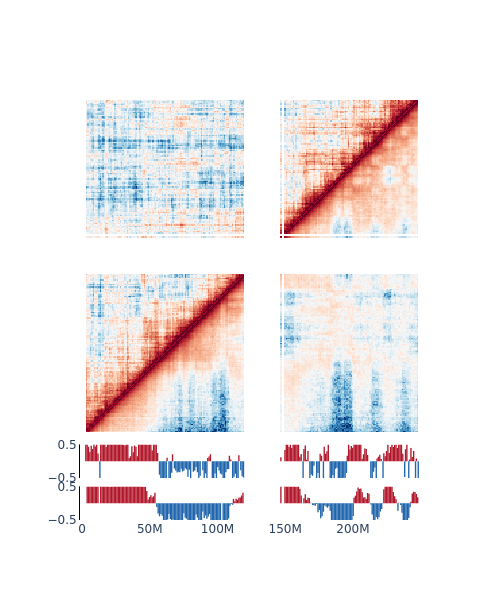

In [22]:
chrom = "chr1"
genome = "GRCh38"
hic_file = coolps["Sperm_hg"]
gam_file = coolps["Sperm_hg_gam"]
hic_eigen = pd.read_table(
    h.ddir / "Sperm_hg.cis.vecs.tsv"
)
ref_track = pd.read_table(
    h.ddir / "GRCh38.gc.1m.tsv",
    index_col=["chrom","start"]
)["GC"]
fig = plot_tilling_gam_hic_eigens(hic_file, gam_file, hic_eigen, ref_track, chrom, genome,
    hic_balance=False,
    hic_kwargs=dict( 
        cmap = "RdBu_r",
        donorm = True,
        range_for_balance = False,
        zmax = 0.9,
        zmin = 0.05
    ),
    gam_kwargs={
        "cmap" : "RdBu_r",
    }
)
fig.show(renderer="png")
fig.write_image(
    get_fig_outprefix() + "human_chr1_gam_hic_eigens.pdf"
)